# Create Structure Database

Below is a simple example of how to create a new structure database for potential fitting with SpgFit.  See [the paper](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.107.104103) for details on the generation.

## Prelude

In [ ]:
from pyiron_potentialfit.assyst import structures as pstruct

In [ ]:
from pyiron import Project

In [9]:
pr = Project('W')

In [11]:
struct_pr = pr.create_group('structures')

## CLI

`python -m pyiron_potentialfit.spgfit.structures --elements W --max-atoms 4  --name W4 --trace 1 --fast-forward $((5 * 60)) --rattle-repetitions 1 --stretch-repetitions 1`

## Python

### Set up Parameters

In [3]:
conf = pstruct.TrainingDataConfig(
    # base name of the structure set, can be whatever
    name='W4',              
    # list of elements that we want to fit
    elements=['W'], 
    # largest number of atoms per cell that we want to allow
    max_atoms=4, 
    # individual number of atoms per cell that we will generate structures for
    # default is range(max_atoms)+1
    stoichiometry=[1,2,3,4],
    # how many structures from the minimization runs to add to the training set, trace=1 means only the final one
    trace=1, 
    # how many random structures with displacements to add per generated structure
    rattle_repetitions=1, 
    # how many random structures with cell changes to add per generated structure
    stretch_repetitions=1,
    # more parameters are available    

    min_dist = 2,
    
    vasp=pstruct.VaspConfig(
        # plane wave cutoff and k point sampling; for structure generation this can be very low;
        # encut=None uses the POTCAR specific default, kmesh is interpreted as KSPACING
        encut=400, kmesh=0.5,
        # can optionally set the VASP version to use, follows the usual pyiron short hand;
        # see job.executable.executable_lst on a VASP job for available options
        version='5.4.4_mpi',
        # any additional INCAR flags can be set here
        incar={
            'LCHARG': '.FALSE.',
            'NCORE': 2,
        },
        # optionally set a magnetic moment *per species*; this will always set up a collinear, ferromagnetically ordered calculation
        # magmoms={'W': 2},
        # POTCARs can be changed per species by setting either the full path to the POTCAR to use, or by using the pyiron defined short hands.
        # Those follow VASP notation, such as Co_pv, but will always use PBE
        # potcars={'W': 'path/to/poscar'},
    ),
    server=pstruct.ServerConfig(
        cores=8,
        # queue name according to pyiron/pysqa cluster configuration
        queue='cmti',
        run_time=30*60
    )
)

### Run

The run function below may not finish on the first call, depending on cluster load. If so it will print a warning and you should call it again.

In [ ]:
pstruct.run(struct_pr, conf, tries=5)

## Look at Output

### SPG structures

In [41]:
spg = struct_pr['containers/W4']

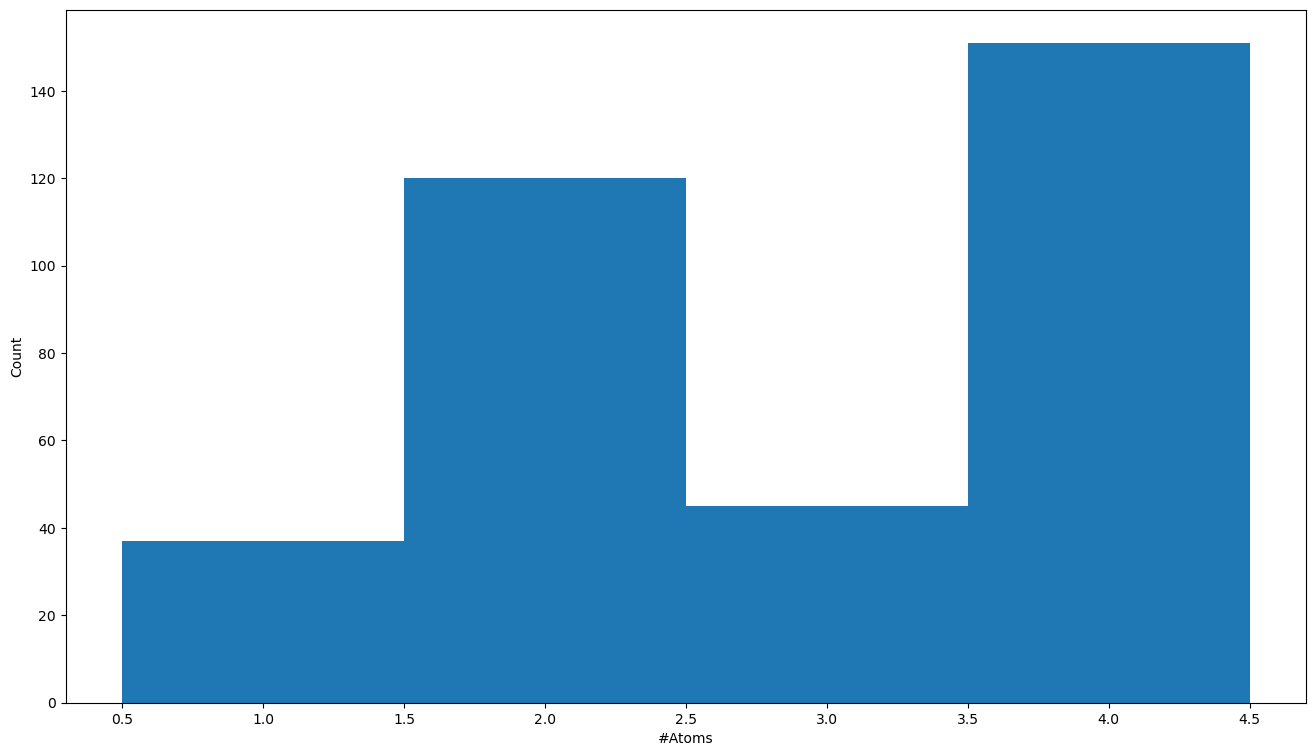

In [43]:
spg.plot.atoms()

,space_group,crystal_system
0,2,triclinic
1,2,triclinic
2,10,monoclinic
3,10,monoclinic
4,10,monoclinic
...,...,...
348,215,cubic
349,225,cubic
350,225,cubic
351,225,cubic


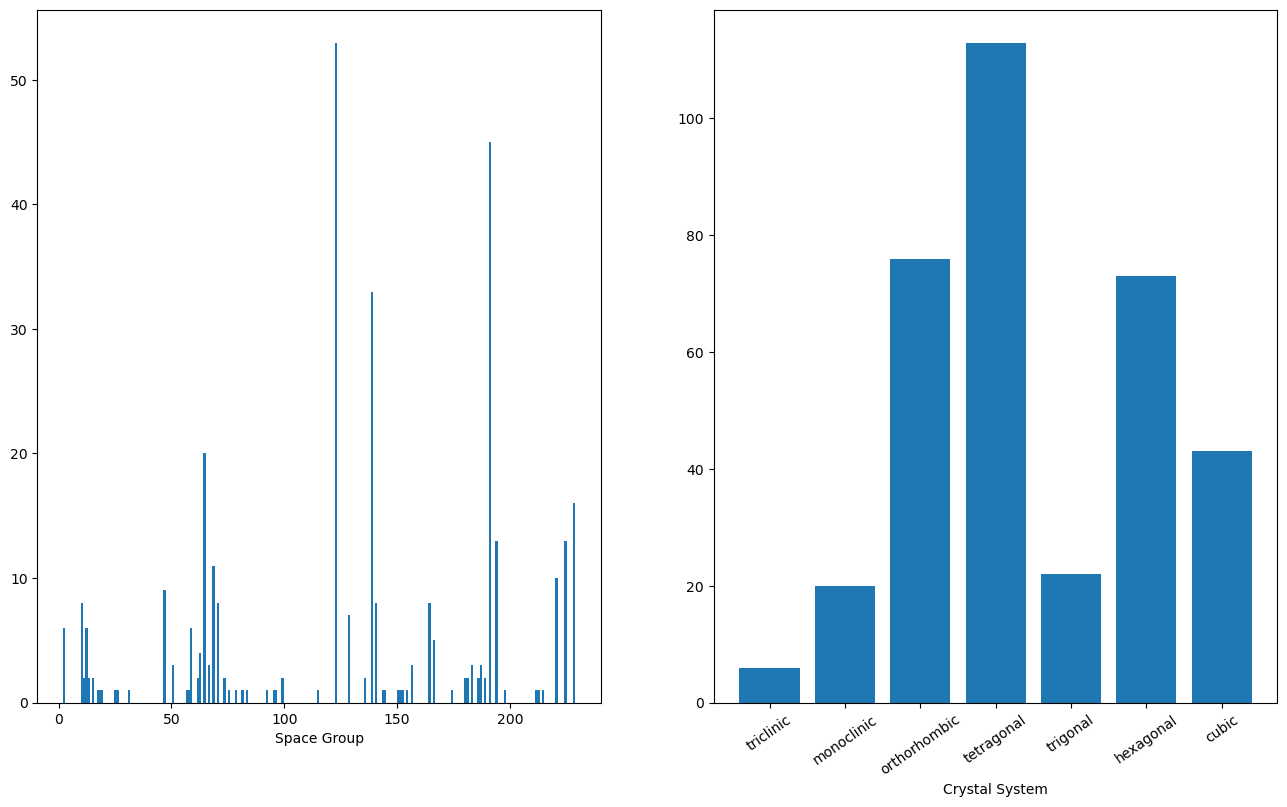

In [44]:
spg.plot.spacegroups()

,a,b,c,alpha,beta,gamma,V,N
0,3.130003,3.548073,3.637928,108.525163,95.914722,92.361131,37.986321,1
1,3.075041,3.971440,4.402601,99.996753,105.895606,107.540298,47.343678,1
2,3.280694,3.242917,3.330044,90.000000,90.000000,109.524321,33.391257,1
3,3.550228,3.039754,4.295311,90.000000,90.000000,110.790147,43.335947,1
4,3.619235,3.003716,3.656798,90.000000,90.000000,99.534552,39.204455,1
...,...,...,...,...,...,...,...,...
348,5.118396,5.118396,5.118396,90.000000,90.000000,90.000000,134.091593,4
349,5.850920,5.850920,5.850920,90.000000,90.000000,90.000000,200.296095,4
350,5.191682,5.191682,5.191682,90.000000,90.000000,90.000000,139.934290,4
351,5.811306,5.811306,5.811306,90.000000,90.000000,90.000000,196.255247,4


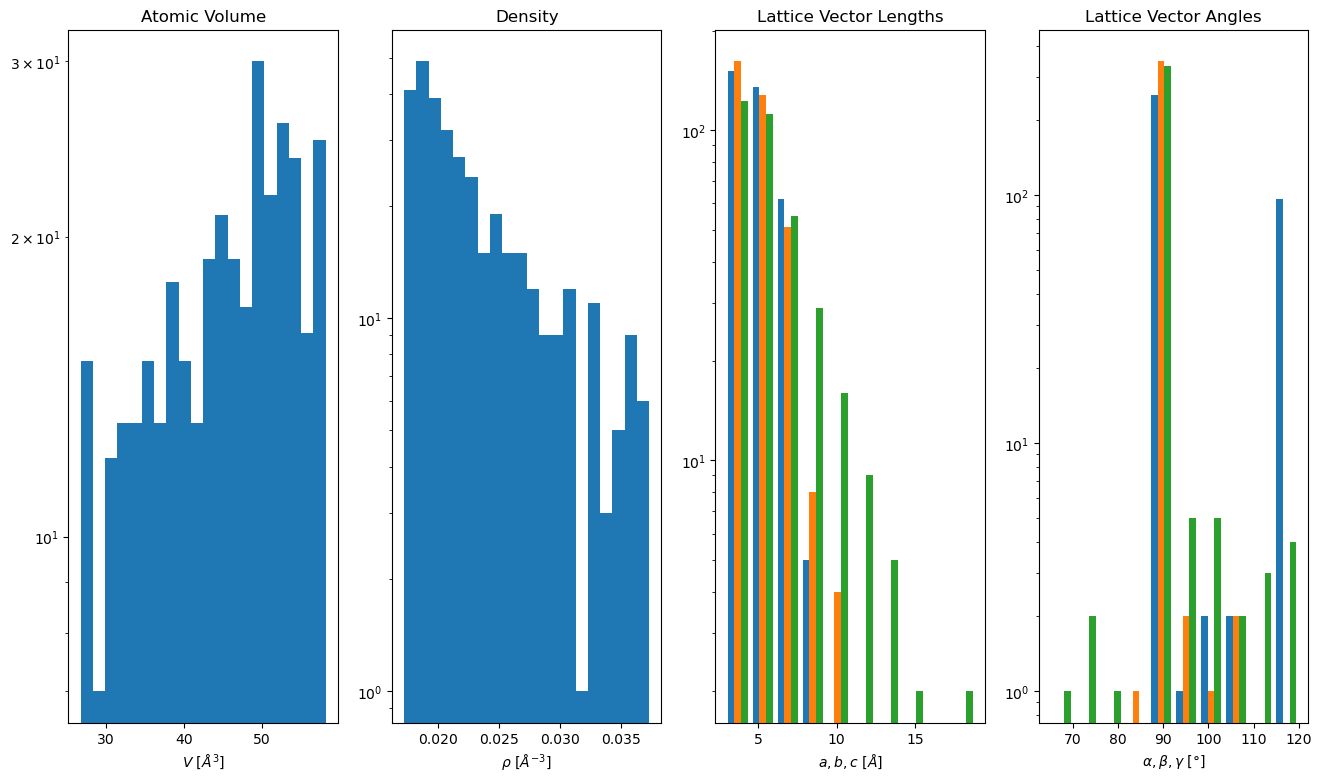

In [45]:
spg.plot.cell()

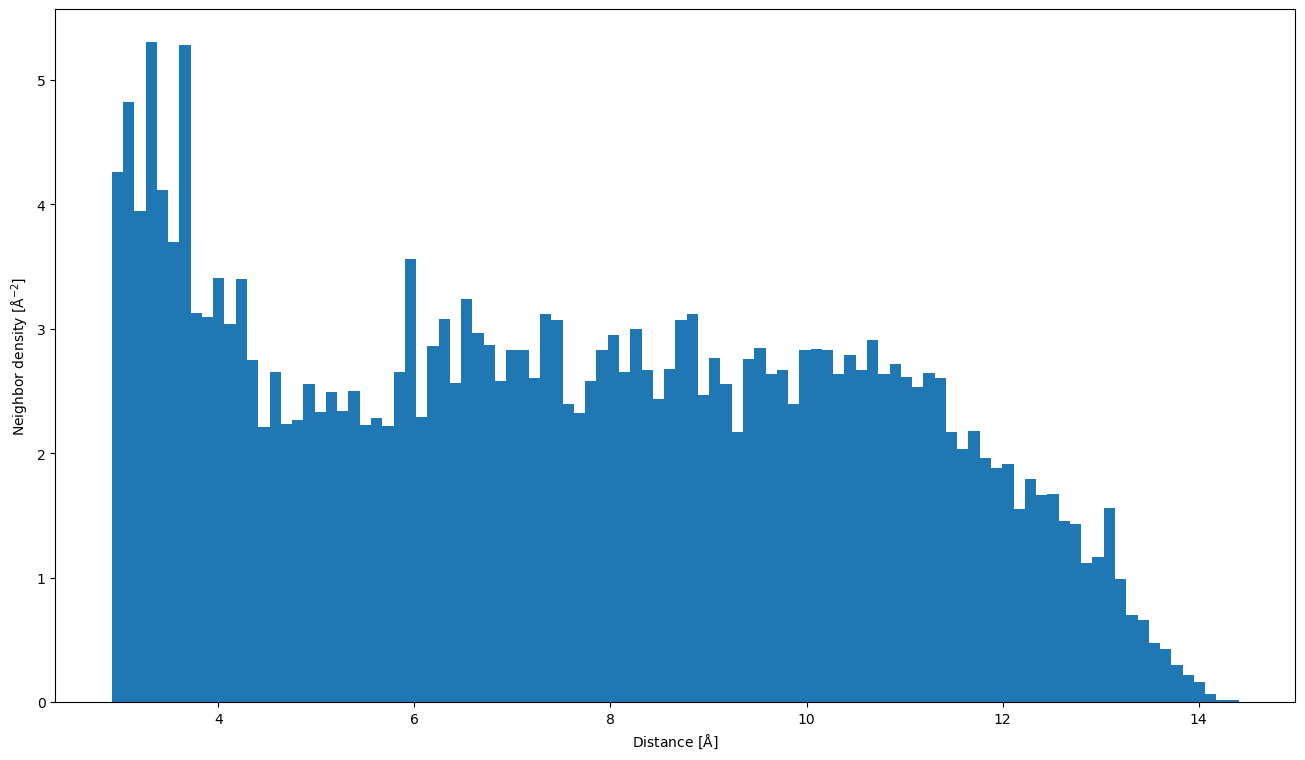

In [47]:
spg.plot.distances(num_neighbors=200, bins=100, normalize=True)

### VolMin

In [48]:
vol = struct_pr['containers/W4VolMin']

,a,b,c,alpha,beta,gamma,V,N
0,2.481760,2.813246,2.884491,108.525162,95.914722,92.361131,18.935316,1
1,2.322562,2.999607,3.325261,99.996753,105.895606,107.540298,20.399101,1
2,2.679442,2.648588,2.719748,90.000000,90.000000,109.524321,18.191510,1
3,2.767668,2.369716,3.348516,90.000000,90.000000,110.790147,20.531548,1
4,2.879607,2.389876,2.909494,90.000000,90.000000,99.534552,19.746253,1
...,...,...,...,...,...,...,...,...
344,4.276352,4.276352,4.276352,90.000000,90.000000,90.000000,78.202464,4
345,4.058352,4.058352,4.058352,90.000000,90.000000,90.000000,66.841963,4
346,4.051988,4.051988,4.051988,90.000000,90.000000,90.000000,66.528013,4
347,4.063303,4.063303,4.063303,90.000000,90.000000,90.000000,67.086909,4


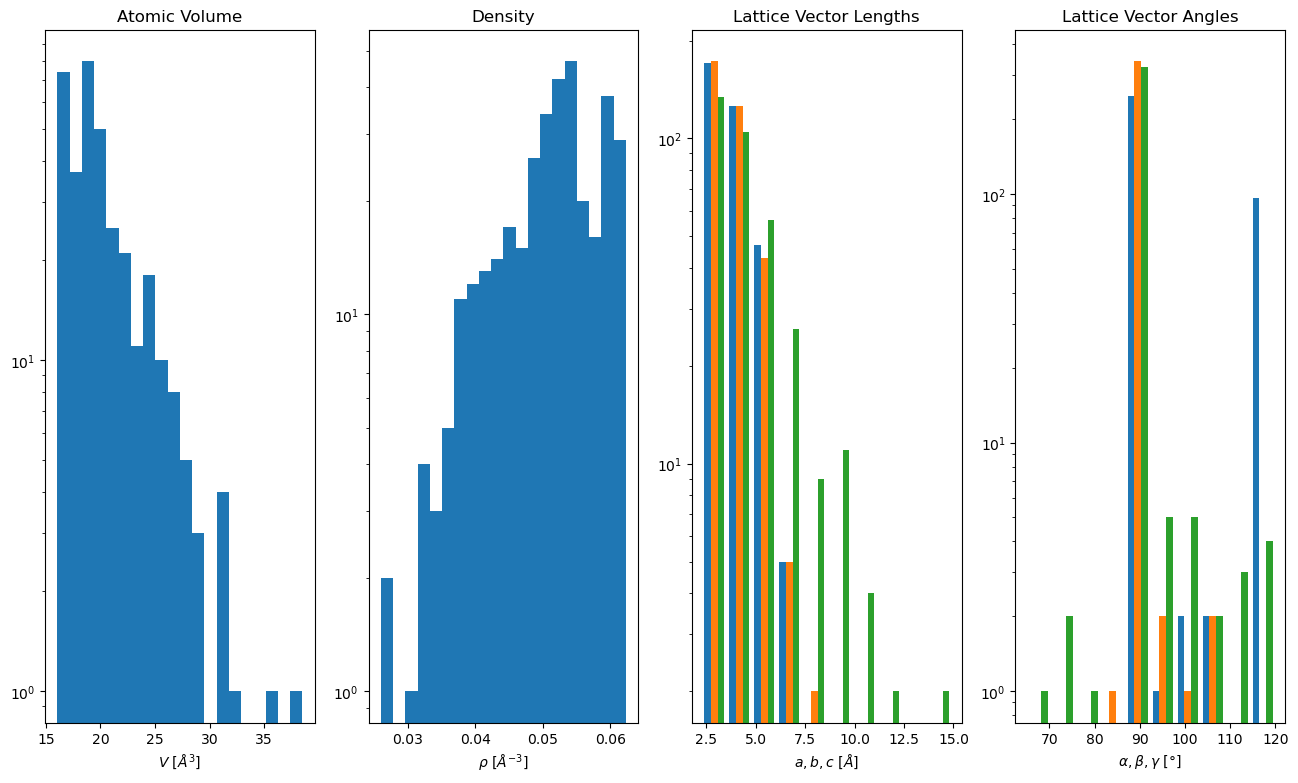

In [50]:
vol.plot.cell()

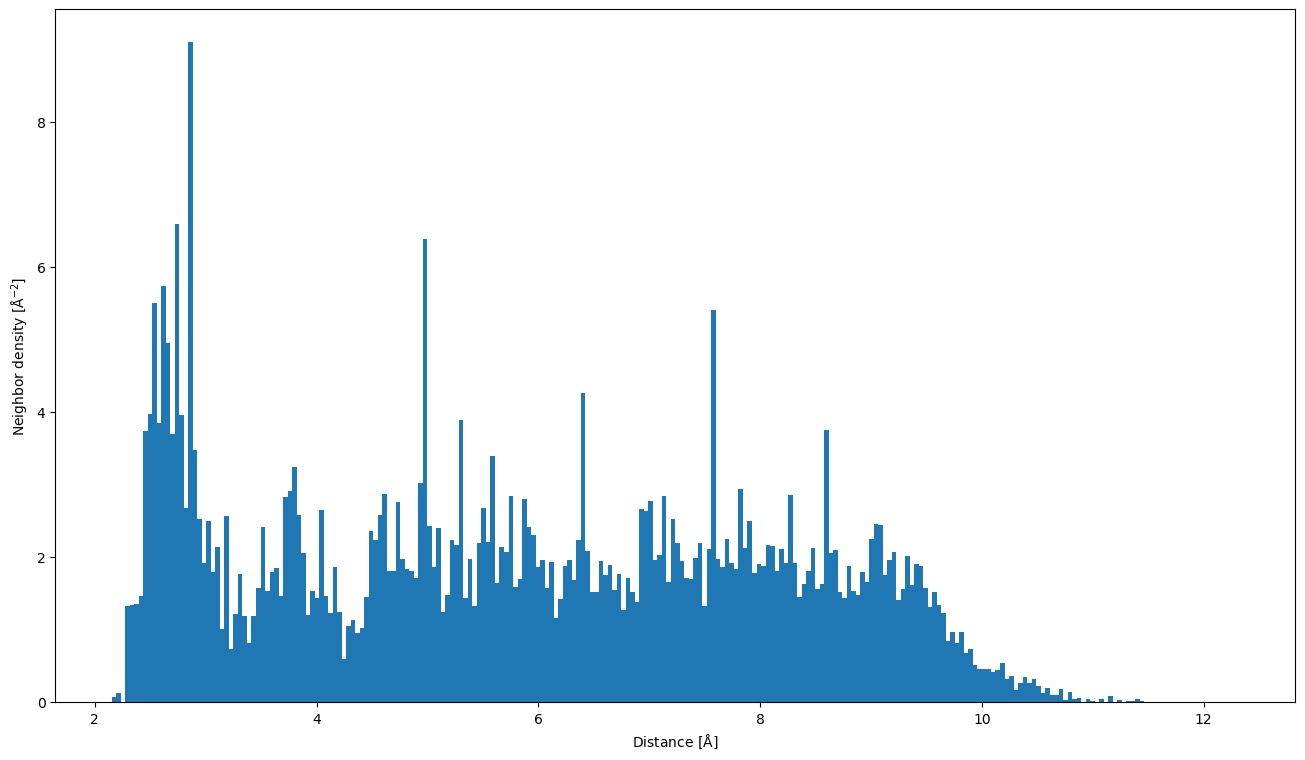

In [60]:
vol.plot.distances(num_neighbors=200, bins=250, normalize=True)

### AllMin

In [53]:
alm = struct_pr['containers/W4VolMinAllMin']

spglib: Point symmetry of primitive cell is broken. (line 723, /home/conda/feedstock_root/build_artifacts/spglib_1707625400306/work/src/spacegroup.c).
spglib: Attempt 0 tolerance = 0.001000 failed. (line 156, /home/conda/feedstock_root/build_artifacts/spglib_1707625400306/work/src/determination.c).
spglib: Point symmetry of primitive cell is broken. (line 723, /home/conda/feedstock_root/build_artifacts/spglib_1707625400306/work/src/spacegroup.c).
spglib: Attempt 0 tolerance = 0.001000 failed. (line 156, /home/conda/feedstock_root/build_artifacts/spglib_1707625400306/work/src/determination.c).
spglib: No point group was found (line 405, /home/conda/feedstock_root/build_artifacts/spglib_1707625400306/work/src/pointgroup.c).
spglib: Attempt 0 tolerance = 1.000000e-03 failed(line 800, /home/conda/feedstock_root/build_artifacts/spglib_1707625400306/work/src/spacegroup.c).
spglib: No point group was found (line 405, /home/conda/feedstock_root/build_artifacts/spglib_1707625400306/work/src/poi

,space_group,crystal_system
0,2,triclinic
1,2,triclinic
2,10,monoclinic
3,47,orthorhombic
4,47,orthorhombic
...,...,...
328,139,tetragonal
329,139,tetragonal
330,123,tetragonal
331,123,tetragonal


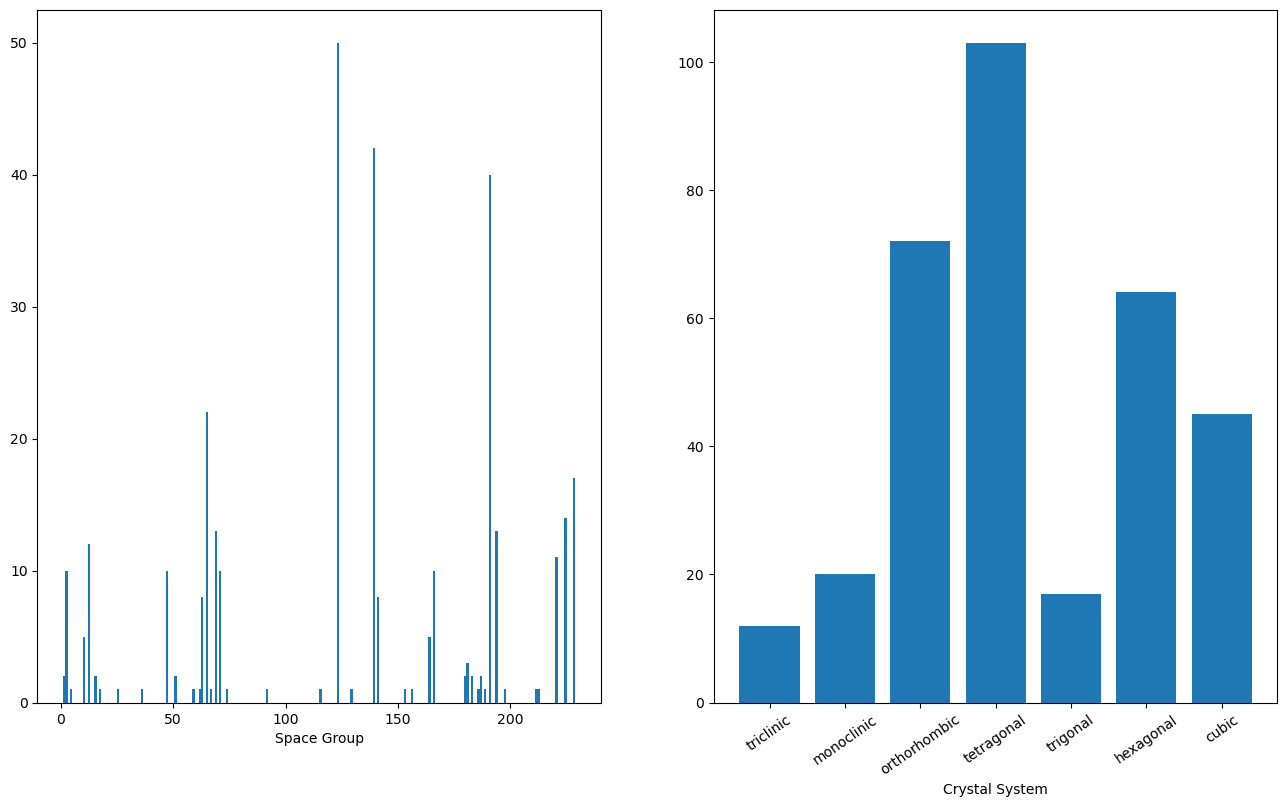

In [54]:
alm.plot.spacegroups()

,a,b,c,alpha,beta,gamma,V,N
0,2.674842,2.778287,2.720905,110.468706,109.450156,107.584664,15.730347,1
1,2.656490,2.768347,2.789334,108.471798,110.365054,109.361900,15.829412,1
2,2.723358,2.594114,2.791027,89.999731,90.000182,119.100788,17.228706,1
3,2.631856,2.636053,2.637871,90.000000,90.000000,90.000000,18.300789,1
4,2.611538,2.634822,2.637153,90.000000,90.000000,90.000000,18.146091,1
...,...,...,...,...,...,...,...,...
328,3.127261,3.127262,7.814437,90.000001,90.000420,90.001002,76.423346,4
329,4.489401,4.489399,3.186169,89.999998,89.999993,89.999999,64.216300,4
330,3.754883,3.754883,5.183304,90.000000,90.000000,90.000009,73.080157,4
331,5.268091,5.268091,2.611611,89.998689,90.001778,90.001502,72.479484,4


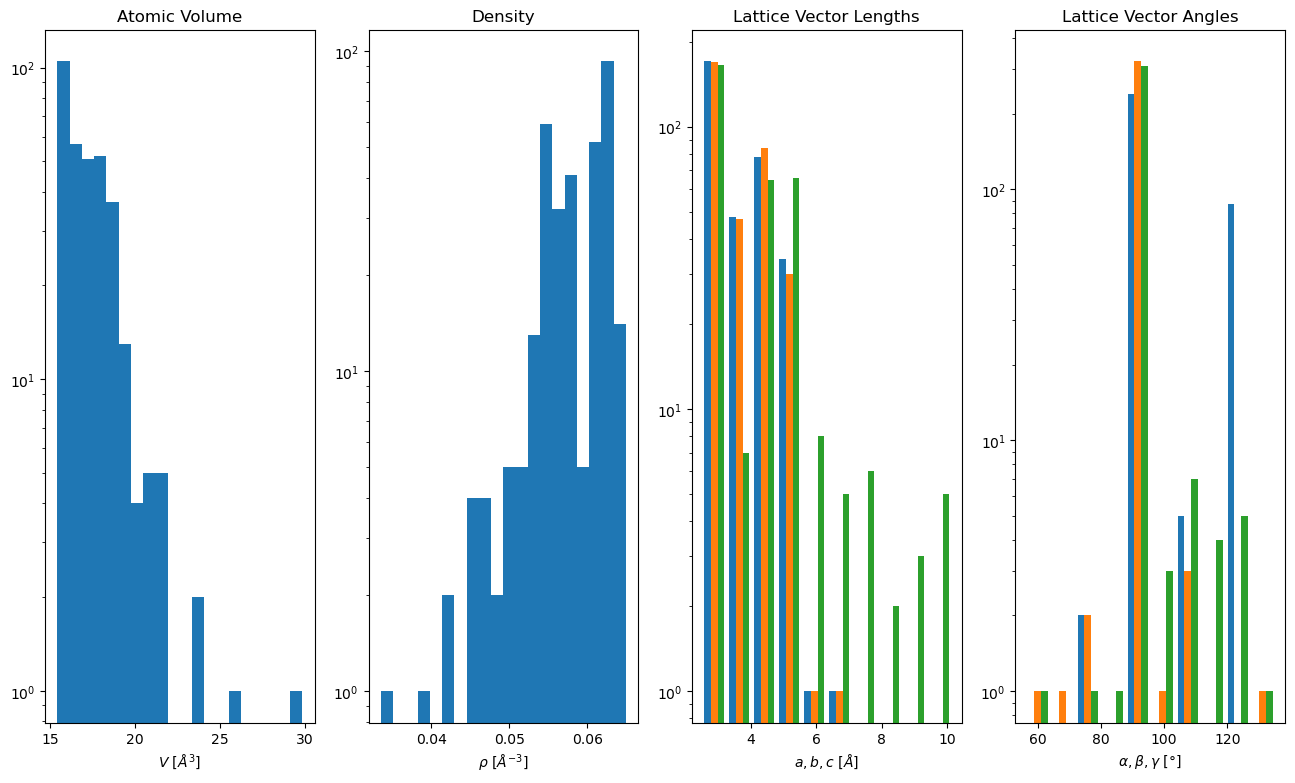

In [55]:
alm.plot.cell()

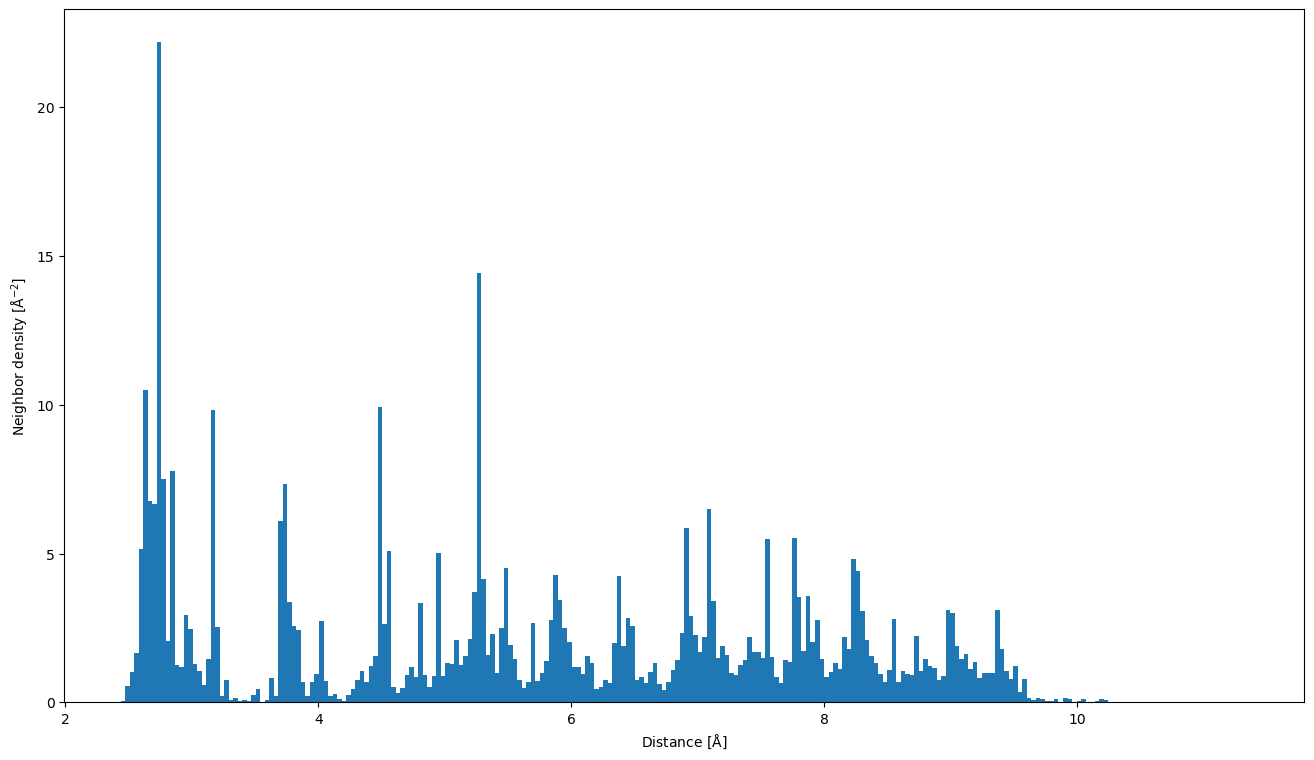

In [65]:
alm.plot.distances(num_neighbors=200, bins=250, normalize=True)